# 1. Model to predict logic AND values
In this tutorial, we are going to experiment with basic deep learning models, in particular with MultiLayer Perceptron(https://en.wikipedia.org/wiki/).

We are going to use a very simple task: the prediction of the logic AND operator.

## 1.1 Logical AND Truth Table

The logical AND operation (denoted as `A ∧ B`) returns `true` if **both** operands are `true`.


| A (I study for the exam) | B (I get enough sleep) | A ∧ B (Result)                           |
|--------------------------|--------------------|-------------------------------------------|
| false                    | false              | false (neither study nor sleep enough)    |
| false                    | true               | false (don't study, but sleep enough)     |
| true                     | false              | false (study, but don't sleep enough)     |
| true                     | true               | true (study and sleep enough)             |

Instead of 'true' and 'false', we can use a series of 0's and 1's.

Let:
- A = "I study for the exam"
- B = "I sleep enough"
- 1 = true
- 0 = false

| A | B | A ∧ B | Interpretation                          |
|---|---|--------|-----------------------------------------|
| 0 | 0 |   0    | I don’t study and I don’t sleep enough  |
| 0 | 1 |   0    | I don’t study but I sleep enough        |
| 1 | 0 |   0    | I study but I don’t sleep enough        |
| 1 | 1 |   1    | I study and I sleep enough              |


This tutorial consists in, given the dataset of truth values of A and B, predict the AND value in output using a deep learning model.

<br><br><hr><br><br>

# 1. Modello per prevedere i valori dell'operatore logico AND
In questo tutorial, andremo a sperimentare modelli di deep learning di base, in particolare il Percettrone Multistrato (MultiLayer Perceptron) (https://en.wikipedia.org/wiki/).

Utilizzeremo un esercizio molto semplice: la previsione dell’operatore logico AND.

## 1.1 Tabella di verità dell’AND logico

L’operazione logico AND (indicato come `A ∧ B`) restituisce `vero` se **entrambi** gli operandi sono `veri`.

| A (Studio per l'esame)  | B (Dormo abbastanza)     | A ∧ B (Risultato)                         |
|-------------------------|--------------------------|-------------------------------------------|
| falso                   | falso                    | falso (né studio né dormo abbastanza)     |
| falso                   | vero                     | falso (non studio, ma dormo abbastanza)   |
| vero                    | falso                    | falso (studio, ma non dormo abbastanza)   |
| vero                    | vero                     | vero (studio e dormo abbastanza)          |

Al posto di 'vero' e 'falso', possiamo usare una sequenza di 0 e 1.

Sia:
- A = "Studio per l’esame"
- B = "Dormo abbastanza"
- 1 = vero
- 0 = falso

| A | B | A ∧ B | Interpretazione                            |
|---|---|--------|--------------------------------------------|
| 0 | 0 |   0    | Non studio e non dormo abbastanza          |
| 0 | 1 |   0    | Non studio ma dormo abbastanza             |
| 1 | 0 |   0    | Studio ma non dormo abbastanza             |
| 1 | 1 |   1    | Studio e dormo abbastanza                  |

Questo tutorial consiste nel prevedere, dato un dataset con i valori di verità di A e B, il valore di A ∧ B in output usando un modello di deep learning.



Start by importing the right libraries
<br><hr><br>
Cominciamo con l'importare le giuste librerie

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## 1.2 Generate the dataset

Create a dataset for the problem. 

The dataset `X` and the label `y` must be numpy arrays.
<hr>

## 1.2 Generare il dataset

Crea un dataset per il problema.  

Il dataset `X` e i valori di riferimento `y` devono essere numpy arrays.  

In [30]:
# AND logic truth table inputs and outputs
X = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float32)

y1 = np.array([0,0,0,1], dtype=np.float32)
y2 = np.array([[0],[0],[0],[1]], dtype=np.float32)

print("X:", X)
print()
print("y:", y1.shape)
print("y:", y2.shape)


X: [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

y: (4,)
y: (4, 1)


In [31]:
# Convert to PyTorch tensors
X = torch.tensor(X)
y = torch.tensor(y2)

## 1.3 Create the model class

Now, we are going to see how to instantiate a deep learning model in Pytorch.

PyTorch is an open-source machine learning library that provides flexible tools for building and training deep learning models, with strong support for dynamic computation graphs and GPU acceleration (https://pytorch.org/).

A pytorch model extends the `nn.Module` class and must define an `__init__` function to specify and initialize the model’s layers and parameters, and a `forward` function to define the computation that occurs when data passes through the model.
<hr>

## 1.3 Creare la classe del modello

Ora vedremo come istanziare un modello di deep learning in PyTorch.

PyTorch è una libreria open-source per il machine learning che fornisce strumenti flessibili per costruire e addestrare modelli di deep learning, con un forte supporto per i grafi computazionali dinamici e l'accelerazione tramite GPU (https://pytorch.org/).

Un modello in PyTorch estende la classe `nn.Module` e deve definire una funzione `__init__` per specificare e inizializzare i layer e i parametri del modello, e una funzione `forward` per definire il calcolo che avviene quando i dati passano attraverso il modello.



In [32]:

# Define a single-layer model
class ANDClassifier(nn.Module):
    def __init__(self):
        super(ANDClassifier, self).__init__()
        self.layer = nn.Linear(2, 1)  # Single neuron
        
    def forward(self, x):
        x = self.layer(x)
        x = torch.sigmoid(x)  # Sigmoid for binary classification
        return x
    
# Initialize the model
model = ANDClassifier()


We can check the specifics of our model, accessing every parameter it has separately
<hr>

Possiamo verificare i dettagli del nostro modello accedendo separatamente a ciascun parametro che lo compone.


In [33]:
for name, param in model.named_parameters():
    print(name, param)

layer.weight Parameter containing:
tensor([[0.2286, 0.2090]], requires_grad=True)
layer.bias Parameter containing:
tensor([0.2015], requires_grad=True)


In [34]:
output = model(X)
print("Output:", output)

Output: tensor([[0.5502],
        [0.6012],
        [0.6059],
        [0.6546]], grad_fn=<SigmoidBackward0>)


## 1.4 The training loop
Now, we are going to start looking at the training of the model. Training is the process of altering the weights of the model so that the outputs values are more similar to the desired ones.
We create two objects, representing:
- The loss function
- The optimizer

### 1.4.1 The loss function
A loss function measures how far the model's predictions are from the true values, guiding the learning process during training.

### 1.4.2 The optimizer
An optimizer is an algorithm that adjusts the model’s parameters based on the loss to help it learn and improve over time.

<hr>

## 1.4 Il ciclo di addestramento

Ora inizieremo a osservare l’addestramento del modello. L’addestramento è il processo di modifica dei pesi del modello affinché i valori in uscita siano sempre più simili a quelli desiderati.  
Creiamo due oggetti che rappresentano:
- La funzione di perdita (loss function)
- L’ottimizzatore

### 1.4.1 La funzione di perdita

Una funzione di perdita misura quanto le predizioni del modello si discostano dai valori reali, guidando il processo di apprendimento durante l’addestramento.

### 1.4.2 L’ottimizzatore

Un ottimizzatore è un algoritmo che regola i parametri del modello in base alla perdita, per aiutarlo ad apprendere e migliorare nel tempo.


In [35]:
# Loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.1)


- The `BCELoss` function in PyTorch is used for binary classification and compares the predicted probability (between 0 and 1) to the true label (0 or 1) using binary cross-entropy

- The `Adam` optimizer is an adaptive learning rate method

<hr>

- La funzione `BCELoss` in PyTorch viene utilizzata per la classificazione binaria e confronta la probabilità predetta (compresa tra 0 e 1) con l’etichetta reale (0 o 1) utilizzando la cross-entropia binaria.

- L’ottimizzatore `Adam` è un metodo che sfrutta un rateo di apprendimento adattivo.


# 1.4.3 Running the loop

In [36]:

# Training loop
epochs = 1000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.1081
Epoch [200/1000], Loss: 0.0466
Epoch [300/1000], Loss: 0.0266
Epoch [400/1000], Loss: 0.0175
Epoch [500/1000], Loss: 0.0125
Epoch [600/1000], Loss: 0.0095
Epoch [700/1000], Loss: 0.0074
Epoch [800/1000], Loss: 0.0060
Epoch [900/1000], Loss: 0.0050
Epoch [1000/1000], Loss: 0.0042


Now, the model has been trained. We can print the parameters values again to see if they are different from before

<hr>

Ora il modello è stato addestrato. Possiamo stampare nuovamente i valori dei parametri per vedere se sono cambiati rispetto a prima.


In [37]:
for name, param in model.named_parameters():
    print(name, param)

layer.weight Parameter containing:
tensor([[10.3373, 10.3369]], requires_grad=True)
layer.bias Parameter containing:
tensor([-15.5669], requires_grad=True)


## 2.1 Evaluation
Now that we have trained the model, we have to check if these learned weights are actually correct.

In this case, a good evaluation metric is the accuracy.

### 2.1.1 Accuracy
Accuracy is the percentage of correct predictions made by a model out of all the predictions it made.

Accuracy = $\frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$

<hr>

## 2.1 Valutazione

Ora che abbiamo addestrato il modello, dobbiamo verificare se i pesi appresi sono effettivamente corretti.

In questo caso, una buona metrica di valutazione è l'accuratezza.

### 2.1.1 Accuratezza

L'accuratezza è la percentuale di predizioni corrette fatte da un modello rispetto a tutte le predizioni effettuate.

Accuratezza = $\frac{\text{Numero di Predizioni Corrette}}{\text{Numero Totale di Predizioni}}$



In [38]:

# Evaluate the model
with torch.no_grad():
    predictions = model(X).round()
    accuracy = (predictions.eq(y).sum().float() / y.size(0)).item()
    print(f'\nAccuracy: {accuracy * 100:.2f}%')



Accuracy: 100.00%


## 3.1 Interpreting the model

In [39]:
# Test predictions
print("\nPredictions:")
for i in range(len(X)):
    pred = predictions[i].item()
    op = 'AND' if pred == 1 else 'NOT AND'
    print(f"{X[i].tolist()} -> Predicted: {op}")




Predictions:
[0.0, 0.0] -> Predicted: NOT AND
[0.0, 1.0] -> Predicted: NOT AND
[1.0, 0.0] -> Predicted: NOT AND
[1.0, 1.0] -> Predicted: AND


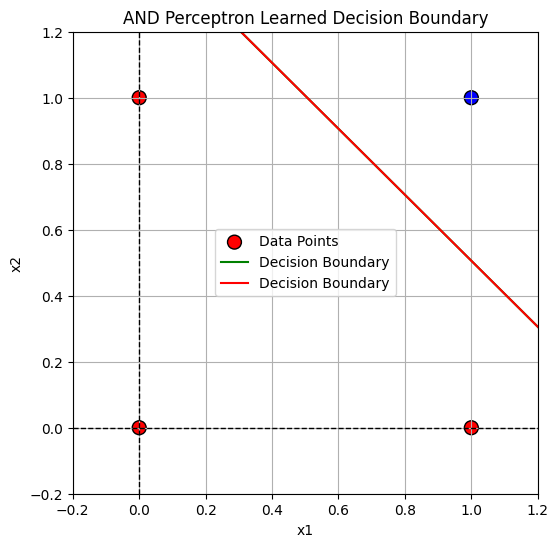

In [40]:
# Extract the learned weights and bias
w1, w2 = model.layer.weight[0].detach().numpy()
b = model.layer.bias[0].detach().numpy()
# Plot the points
plt.figure(figsize=(6, 6))
colors = ['red' if label == 0 else 'blue' for label in y.numpy().flatten()]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='k', label='Data Points')

# Plot the learned decision boundary
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(w2 * x1 + b) / w1
plt.plot(x1, x2, label='Decision Boundary', color='green')
x2 = -(w1 * x1 + b) / w2
plt.plot(x1, x2, label='Decision Boundary', color='red')

# Formatting
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('AND Perceptron Learned Decision Boundary')
plt.legend()
plt.grid(True)

plt.show()